In [16]:
X = list(range(10))
Y = [1,1,2,3,5,6,7,8,9,9]

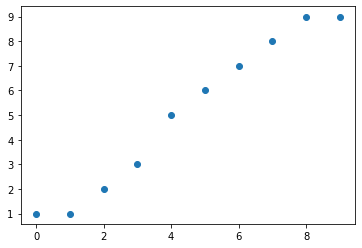

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [18]:
class H():
    def __init__(self,w):
        self.w = w
        
    def forward(self,x):
        return self.w * x
    
def cost(h,X,Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error /= len(X)
    return error
        
h = H(4)
cost(h,X,Y)

239.1

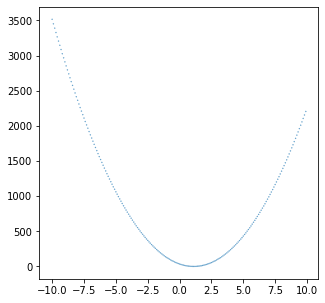

In [25]:
list_w = []
list_c = []

for i in range(-100,100):
    w = i * 0.1
    h = H(w)
    c = cost(h,X,Y)
    list_w.append(w)
    list_c.append(c)

plt.figure(figsize=(5,5))
plt.scatter(list_w,list_c,s=[0.1 for i in range(100)])

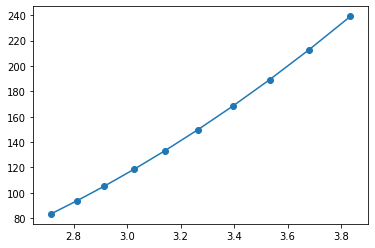

In [34]:
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h,X,Y)
    eps = 0.001
    h = H(w+eps)
    cost2 = cost(h,X,Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost/dw
    return grad, (cost1+cost2)*0.5
    
def cal_grad2(w,cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h,x,y)
    return grad, c
    
w1 = 4
w2 = 4
lr = 0.001

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []


for i in range(10):
    grad, mean_cost = cal_grad(w1,cost)
    grad2, mean_cost2 = cal_grad2(w2,cost)
    
    w1 = w1 + lr * (-grad)
    w2 = w2 + lr * (-grad2)
    
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

plt.scatter(list_w1,list_c1)
plt.plot(list_w2,list_c2)
